In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

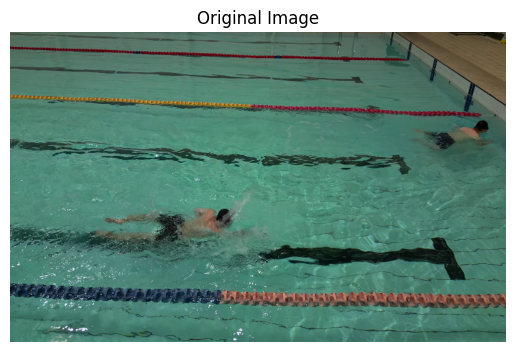

In [42]:
image = cv2.imread(r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\data\images\train\000002.jpg')
image = cv2.resize(image, (800, 500))
image_for_plt_display = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# cv2.imshow('Original Image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(image_for_plt_display)
plt.title('Original Image')
plt.axis('off')
plt.show()


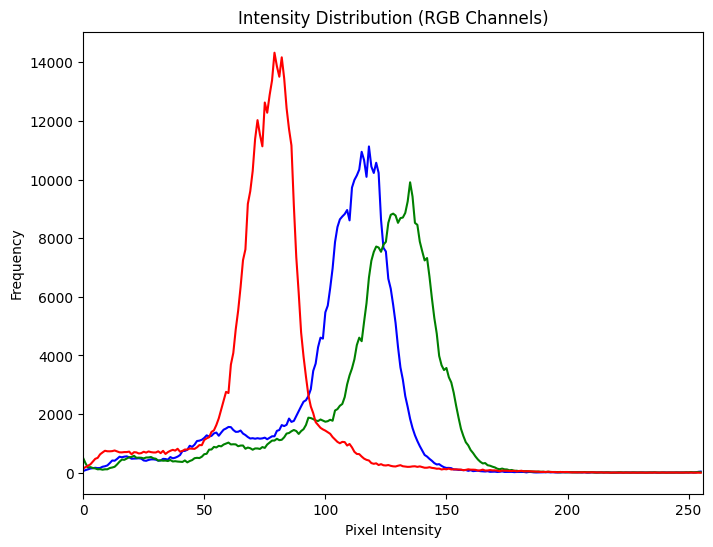

In [43]:
colors = ('b', 'g', 'r')

plt.figure(figsize=(8, 6))
for i, color in enumerate(colors):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color=color)
    plt.xlim([0, 256])

plt.title('Intensity Distribution (RGB Channels)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

Percentage of the area from 78 to 91: 78.66%


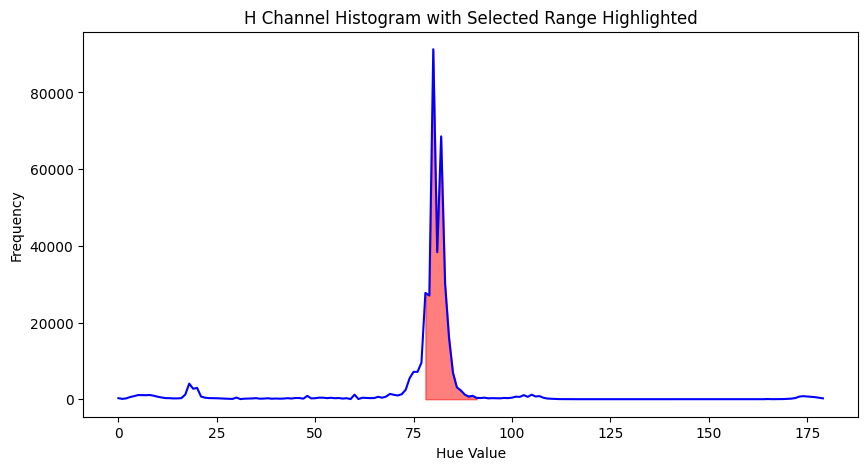

In [44]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Extract the H, S, V channels
# h_channel, s_channel, v_channel = cv2.split(hsv_image)

# Calculate the histogram for the H channel (0 - 179)
hist = cv2.calcHist([hsv_image], [0], None, [180], [0, 180])

# Calculate area within the range
lower_bound = 78
upper_bound = 91
area_in_range = np.sum(hist[lower_bound:upper_bound + 1])
total_area = np.sum(hist)
percentage = (area_in_range / total_area) * 100

# Print the percentage
print(f"Percentage of the area from {lower_bound} to {upper_bound}: {percentage:.2f}%")

# Plot the histogram and highlight the range
plt.figure(figsize=(10, 5))
plt.plot(hist, color='blue')
plt.fill_between(np.arange(lower_bound, upper_bound + 1), hist[lower_bound:upper_bound + 1].ravel(), color='red', alpha=0.5)
plt.title('H Channel Histogram with Selected Range Highlighted')
plt.xlabel('Hue Value')
plt.ylabel('Frequency')
plt.show()

In [45]:
# Remove hue in the range
filtered_hsv_image = hsv_image.copy()
mask = cv2.inRange(hsv_image[:, :, 0], lower_bound, upper_bound)
filtered_hsv_image[:, :, 2][mask > 0] = 255
filtered_hsv_image[:, :, 1][mask > 0] = 0

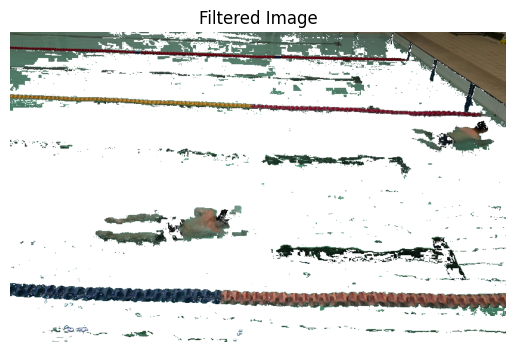

In [46]:
filtered_image = cv2.cvtColor(filtered_hsv_image, cv2.COLOR_HSV2BGR)
filtered_image_for_plt_display = cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB)

plt.imshow(filtered_image_for_plt_display)
plt.title('Filtered Image')
plt.axis('off')
plt.show()